In [2]:
from MNIST_CNN import CNN
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

retrain = False

I will try the model proposed in the lecture slide, composed, in order by:
-Conv2D, 6 filters
-MaxPooling
-Conv2D, 16 filters
-MaxPooling
-Flatten
-Dense with 256 neurons
-Dropout
-Dense with softmax layer, 10 neurons

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Loading pre-trained model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9770 - loss: 0.0722

Test loss: 0.05841011181473732
Test accuracy: 0.9812999963760376


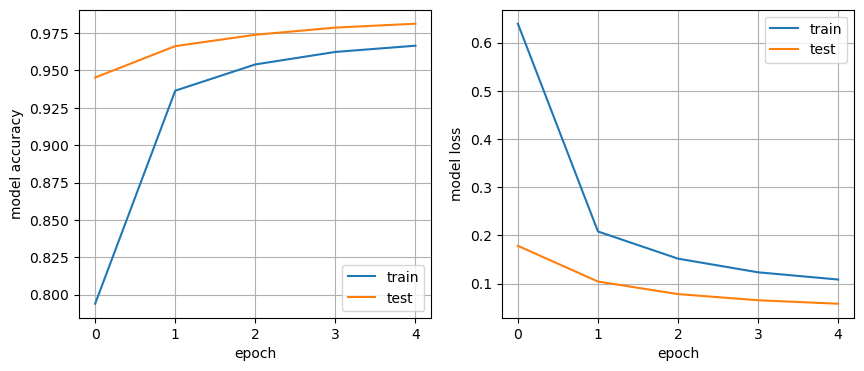

In [6]:
model_CNN = CNN(32, 5)
(score, history) = (None, None)

model_filename = './CNN.keras'
hist_filename = './hist.npy'

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

    (score, history) = model_CNN.train_CNN()
    model_CNN.save_model()

else:

    model_CNN.load_model()
    (score, history) = model_CNN.evaluate_CNN()

# look into training history

plt.figure().set_size_inches(10, 4)

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.show()

sgd_score = score                   # I will need this later

The CNN behaves better, after only 5 epochs, than the DNN after 15 epochs => huge improvement, and the net still hasn't converged

In [7]:
print(model_CNN.model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,936 (277.10 KB)

 Trainable params: 70,934 (277.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


I will now try to change optimizer again, with the same procedure as in Ex12_2

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Model architecture created successfully!

Test loss: 0.039145004004240036
Test accuracy: 0.9887999892234802
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Completed: 1/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Model architecture created successfully!

Test loss: 0.03541823476552963
Test accuracy: 0.9883999824523926
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Completed: 2/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Model architecture created successfully!

Test loss: 2.0690553188323975
Test accuracy: 0.47850000858306885
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Completed: 3/4
X_train shape: (60000, 28, 28)
Y_train shape: (6000

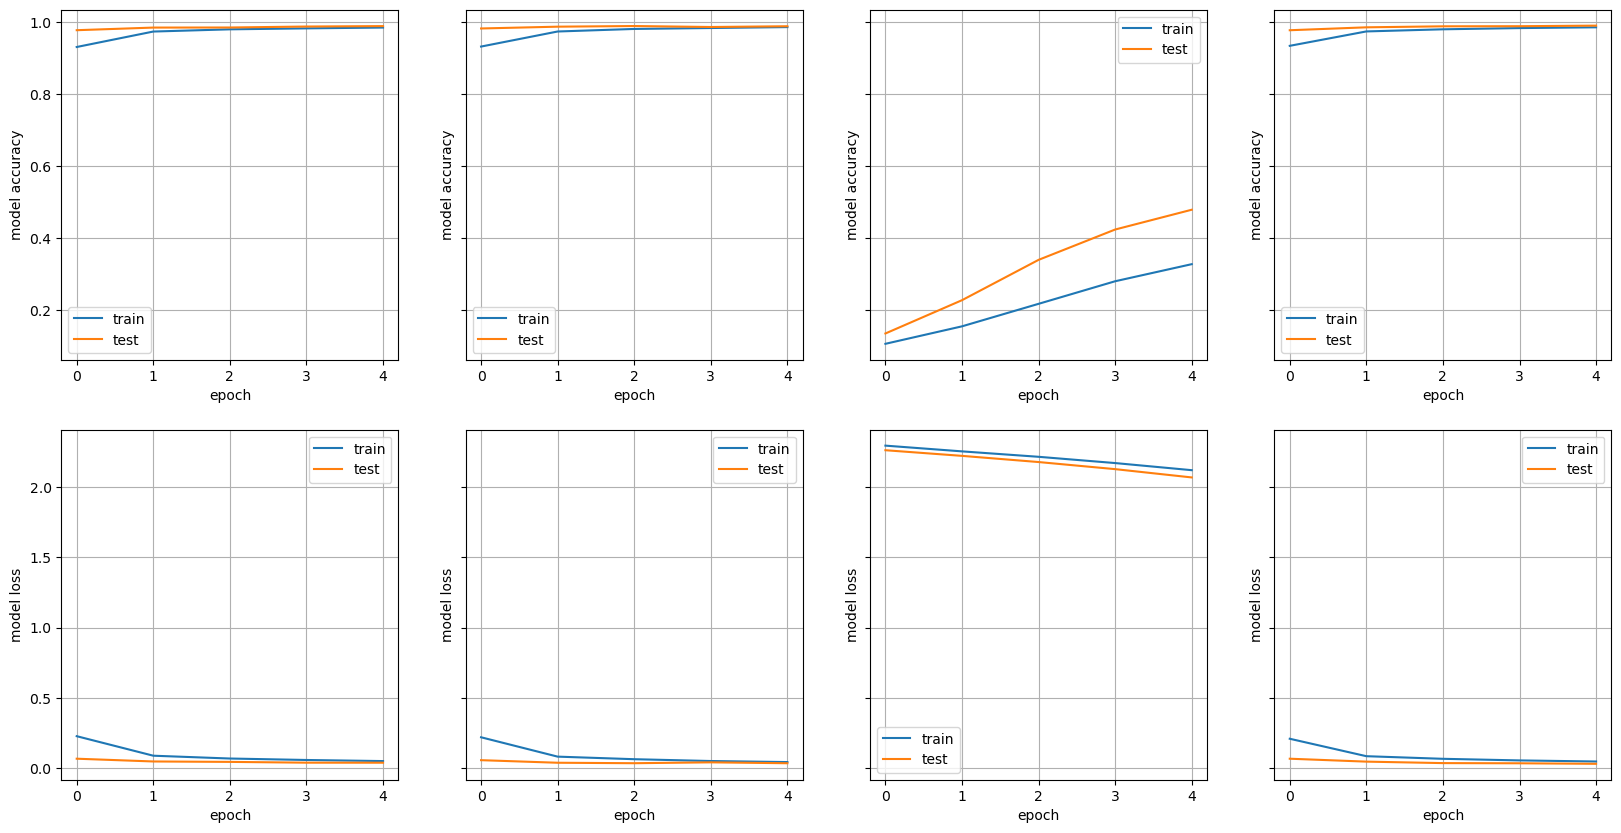

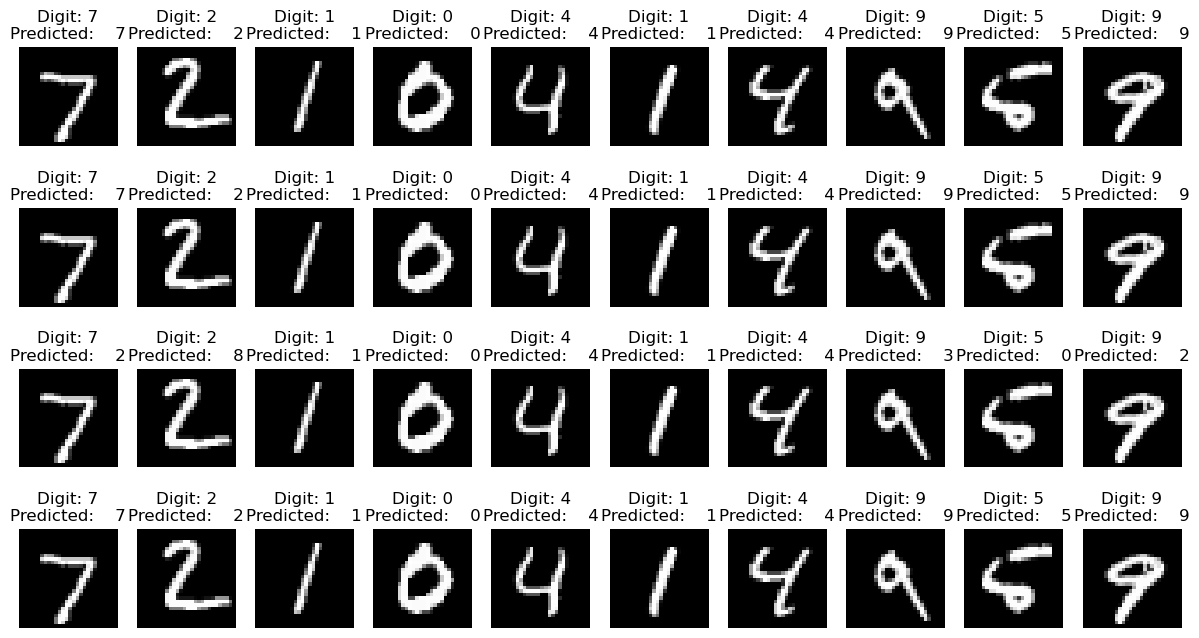

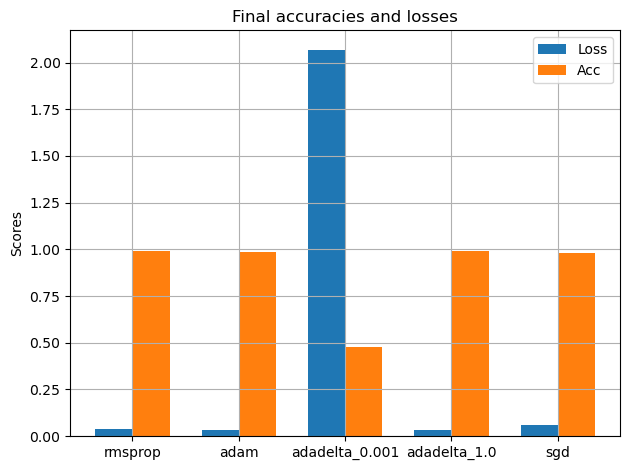

In [10]:
Optimizers = [RMSprop(), Adam(), Adadelta(), Adadelta(learning_rate = 1.0)] 
Optimizers_Str = ['rmsprop', 'adam', 'adadelta_0.001', 'adadelta_1.0'] 

figure_train, ax_train = plt.subplots(2, len(Optimizers), sharey = 'row')
figure_pred, ax_pred = plt.subplots(len(Optimizers), 10)

figure_train.set_size_inches(20, 10)
figure_pred.set_size_inches(15, 8)

path = './OptimizerCmp/'

Accuracies = []
Losses = []

for idx, Optimizer in enumerate(Optimizers):

    model_filename = path + 'CNN_' + Optimizers_Str[idx] + ".keras"
    hist_filename = path + 'hist_' + Optimizers_Str[idx] + ".npy"

    model_CNN = CNN(32, 5, Optimizer, False)
    (score, history) = (None, None)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

        (score, history) = model_CNN.train_CNN()
        model_CNN.save_model(model_filename, hist_filename)

    else:

        model_CNN.load_model(model_filename, hist_filename)
        (score, history) = model_CNN.evaluate_CNN()

    ax_acc = ax_train[0][idx]
    ax_loss = ax_train[1][idx]

    # summarize history for accuracy
    ax_acc.plot(history.history['acc'])
    ax_acc.plot(history.history['val_acc'])
    ax_acc.set_ylabel('model accuracy')
    ax_acc.set_xlabel('epoch')
    ax_acc.legend(['train', 'test'], loc='best')
    ax_acc.grid(True)

    # summarize history for loss
    ax_loss.plot(history.history['loss'])
    ax_loss.plot(history.history['val_loss'])
    ax_loss.set_ylabel('model loss')
    ax_loss.set_xlabel('epoch')
    ax_loss.legend(['train', 'test'], loc='best')
    ax_loss.grid(True)

    predictions = model_CNN.CNN_predict()
    X_test = model_CNN.X_test.reshape(model_CNN.X_test.shape[0], model_CNN.img_rows, model_CNN.img_cols, 1)

    for i in range(10):    
        ax = ax_pred[idx][i]    
        ax.imshow(X_test[i, :, :, 0], cmap='gray')    
        ax.set_title("Digit: {}\nPredicted:    {}".format(np.argmax(model_CNN.Y_test[i]), np.argmax(predictions[i])))    
        ax.axis('off') 

    print("Completed: {}/{}".format(idx + 1, len(Optimizers)))

    Losses.append(score[0])
    Accuracies.append(score[1])

plt.show()

#add sgd data
Losses.append(sgd_score[0])
Accuracies.append(sgd_score[1])
Optimizers_Str.append('sgd')

x = np.arange(len(Optimizers_Str))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Losses, width, label='Loss')
rects2 = ax.bar(x + width/2, Accuracies, width, label='Acc')

# Add some text for Optimizers_Str, title and custom x-axis tick Optimizers_Str, etc.
ax.set_ylabel('Scores')
ax.set_title('Final accuracies and losses')
ax.set_xticks(x)
ax.set_xticklabels(Optimizers_Str)
ax.legend()
ax.grid(True)
fig.tight_layout()

plt.show()

Again, the best optimizer is given by adadelta with learnin rate of 1.0 => the final performance is indeed exceptional, with acc = 0.99 and loss = 0.03

As a last step, I will train the network for a larger number of epochs, N_Epoch = 15

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Model architecture created successfully!


/home/yggdrasil/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - acc: 0.8637 - loss: 0.4198 - val_acc: 0.9793 - val_loss: 0.0600
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.9722 - loss: 0.0950 - val_acc: 0.9851 - val_loss: 0.0439
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.9799 - loss: 0.0700 - val_acc: 0.9870 - val_loss: 0.0391
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.9840 - loss: 0.0566 - val_acc: 0.9873 - val_loss: 0.0351
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.9860 - loss: 0.0501 - val_acc: 0.9891 - val_loss: 0.0329
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - acc: 0.9873 - loss: 0.0444 - val_acc: 0.9887 - val_loss: 0.0353
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - acc: 0.9876 - loss: 0.0417 - val_acc: 0.9899 - val_loss: 0.0329
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - acc: 0.9883 - loss: 0.0401 - val_acc: 0.9895 - val_loss: 0.0323
Epoch 9/15
1875/1875 ━━━━━━━━

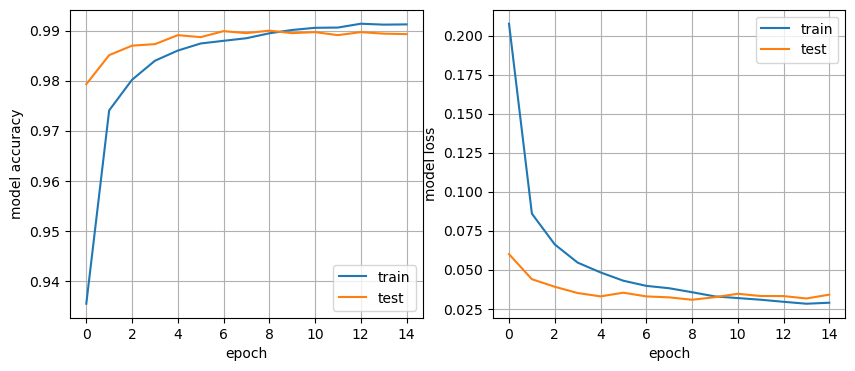

In [12]:
model_CNN = CNN(32, 15, Adadelta(learning_rate = 1.0))
(score, history) = (None, None)

model_filename = './CNN_final.keras'
hist_filename = './hist_final.npy'

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

    (score, history) = model_CNN.train_CNN()
    model_CNN.save_model(model_filename, hist_filename)

else:

    model_CNN.load_model(model_filename, hist_filename)
    (score, history) = model_CNN.evaluate_CNN()

# look into training history

plt.figure().set_size_inches(10, 4)

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.show()

15 epochs is a bit too much, since the network has alrady stabilized after around 10 epochs. Anyway this will be my final CNN model.